About Dataset
Binary Customer Churn

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.
Content

The data is saved as customer_churn.csv. Here are the fields and their definitions:

Name : Name of the latest contact at Company

Age: Customer Age

Total_Purchase: Total Ads Purchased

Account_Manager: Binary 0=No manager, 1= Account manager assigned

Years: Totaly Years as a customer

Num_sites: Number of websites that use the service.

Onboard_date: Date that the name of the latest contact was onboarded

Location: Client HQ Address

Company: Name of Client Company

Once you've created the model and evaluated it, test out the model on some new data (you can think of this almost like a hold-out set) that your client has provided, saved under new_customers.csv. The client wants to know which customers are most likely to churn given this data (they don't have the label yet).

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_path = Path("../datasets")
RANDOM_STATE = 42	

In [243]:
ratings_file = base_path / "customer_churn.csv"

# Verifica se o arquivo existe e carrega o DataFrame
if ratings_file.exists():
    df_raw = pd.read_csv(ratings_file)
    df_orig = pd.read_csv(ratings_file)
    display(df_raw.head())
    display(df_raw.shape)
else:
    print(f"Arquivo não encontrado: {ratings_file.resolve()}")

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


(900, 10)

In [244]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [245]:
df_raw.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [246]:

pd.DataFrame(round(df_raw.isnull().sum()*100/len(df_raw),2).sort_values(ascending=False))

,0
Names,0.0
Age,0.0
Total_Purchase,0.0
Account_Manager,0.0
Years,0.0
Num_Sites,0.0
Onboard_date,0.0
Location,0.0
Company,0.0
Churn,0.0


In [247]:
pd.DataFrame(round(df_raw.nunique()*100/len(df_raw),4).sort_values(ascending=False))

,0
Onboard_date,100.0000
Total_Purchase,100.0000
Location,100.0000
Names,99.8889
Company,97.0000
Years,46.4444
Age,4.0000
Num_Sites,1.3333
Account_Manager,0.2222
Churn,0.2222


In [254]:
df_raw["Account_Manager"].sum()

np.int64(433)

In [248]:
remove_col = ['Location', 'Names', 'Company']
df_clean = df_raw.drop(columns=remove_col, inplace=False)

df_clean["Onboard_date"] = pd.to_datetime(df_clean["Onboard_date"])
df_clean["Days_Onboard"] = (ref_date - df_clean["Onboard_date"]).dt.days
df_clean = df_clean.drop(columns=["Onboard_date"])
df_clean.head()


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Days_Onboard
0,42.0,11066.80,0,7.22,8.0,1,1219
1,41.0,11916.22,0,6.50,11.0,1,1236
2,38.0,12884.75,0,6.67,12.0,1,185
3,42.0,8010.76,0,6.71,10.0,1,984
4,37.0,9191.58,0,5.56,9.0,1,347


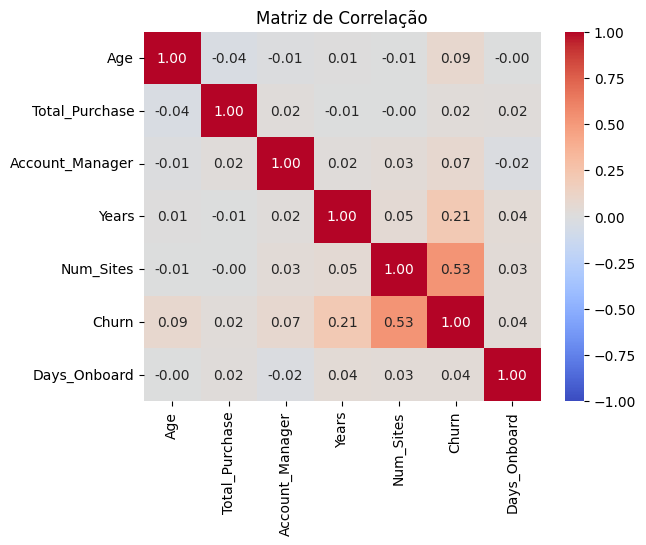

In [249]:
df_clean_correlation = df_clean.corr()
sns.heatmap(df_clean_correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

In [250]:
selected_columns = ['Age', 'Account_Manager', 'Years', 'Num_Sites', 'Days_Onboard', 'Churn']
df_processed = df_clean[selected_columns].copy()

df_processed['purchase_range'] = pd.cut(df_clean['Total_Purchase'], bins=4, labels=['a', 'b', 'c', 'd'])

df_processed.head()

,Age,Account_Manager,Years,Num_Sites,Days_Onboard,Churn,purchase_range
0,42.0,0,7.22,8.0,1219,1,c
1,41.0,0,6.50,11.0,1236,1,c
2,38.0,0,6.67,12.0,185,1,c
3,42.0,0,6.71,10.0,984,1,b
4,37.0,0,5.56,9.0,347,1,c


In [251]:

df_encoded = pd.get_dummies(df_processed, columns=['purchase_range'], prefix='purchase')
df_encoded = pd.get_dummies(df_encoded, columns=['Account_Manager'], prefix='account_manager')

df_encoded = df_encoded.astype({col: int for col in df_encoded.columns if df_encoded[col].dtype == bool})


df_encoded.columns = [x.lower() for x in df_encoded.columns.tolist()]
print(df_encoded.shape)
print(df_encoded.dtypes)
display(df_encoded.head())

(900, 11)
age                  float64
years                float64
num_sites            float64
days_onboard           int64
churn                  int64
purchase_a             int64
purchase_b             int64
purchase_c             int64
purchase_d             int64
account_manager_0      int64
account_manager_1      int64
dtype: object


,age,years,num_sites,days_onboard,churn,purchase_a,purchase_b,purchase_c,purchase_d,account_manager_0,account_manager_1
0,42.0,7.22,8.0,1219,1,0,0,1,0,1,0
1,41.0,6.50,11.0,1236,1,0,0,1,0,1,0
2,38.0,6.67,12.0,185,1,0,0,1,0,1,0
3,42.0,6.71,10.0,984,1,0,1,0,0,1,0
4,37.0,5.56,9.0,347,1,0,0,1,0,1,0


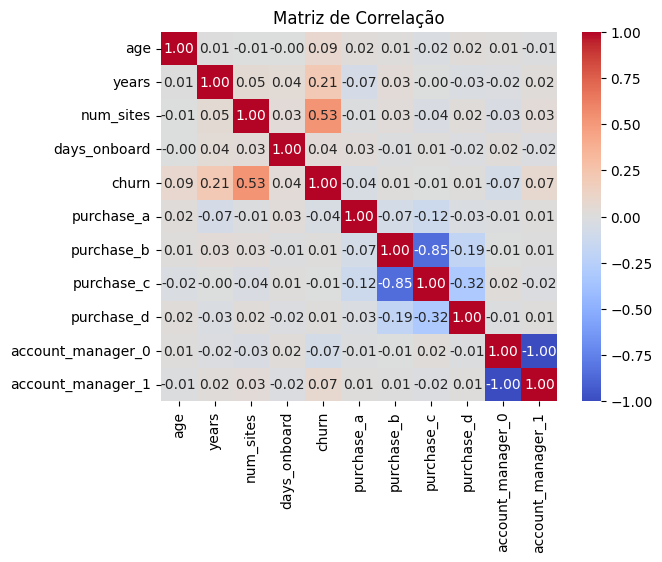

In [252]:
df_encoded_correlation = df_encoded.corr()
sns.heatmap(df_encoded_correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, make_scorer, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [117]:
# Colunas numéricas que queremos escalar
numeric_features = ['age', 'years', 'num_sites', 'days_onboard']

# 3 opções de pré-processamento
scaler_none = 'passthrough'
scaler_std = ColumnTransformer([('scale', StandardScaler(), numeric_features)], remainder='passthrough')
scaler_minmax = ColumnTransformer([('scale', MinMaxScaler(), numeric_features)], remainder='passthrough')

# Pipeline genérico
pipeline = Pipeline([
    ('scaler', scaler_none),   # placeholder
    ('smote', SMOTE()),        # placeholder
    ('clf', RandomForestClassifier())  # placeholder
])

# Parametrizações combinadas com scalers
rf_params = {
    'scaler': [scaler_none, scaler_std, scaler_minmax],
    'smote': [SMOTE(random_state=42), BorderlineSMOTE(random_state=42)],
    'clf': [RandomForestClassifier(random_state=42)],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__class_weight': [None, 'balanced']
}

lr_params = {
    'scaler': [scaler_none, scaler_std, scaler_minmax],
    'smote': [SMOTE(random_state=42), BorderlineSMOTE(random_state=42)],
    'clf': [LogisticRegression(solver='liblinear', max_iter=1000)],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__class_weight': [None, 'balanced']
}

xgb_params = {
    'scaler': [scaler_none, scaler_std, scaler_minmax],
    'smote': [SMOTE(random_state=42), BorderlineSMOTE(random_state=42)],
    'clf': [XGBClassifier(eval_metric='logloss', random_state=42)],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5],
    'clf__learning_rate': [0.01, 0.1, 0.3],
    'clf__scale_pos_weight': [1, 5, 10]
}

param_grid = [lr_params, xgb_params, rf_params]	


In [118]:
# GridSearch
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, pos_label=1),
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Treinamento
grid_search.fit(X_train, y_train)

# Resultados
print("\n✅ Melhor combinação de parâmetros:")
print(grid_search.best_params_)
print("\nMelhor F1 Score (validação):", grid_search.best_score_)

# Avaliação final
y_pred = grid_search.predict(X_test)
print("\n📊 Classification Report (teste):\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits

✅ Melhor combinação de parâmetros:
{'clf': LogisticRegression(max_iter=1000, solver='liblinear'), 'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l1', 'scaler': 'passthrough', 'smote': BorderlineSMOTE(random_state=42)}

Melhor F1 Score (validação): 0.6719761719761719

📊 Classification Report (teste):

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       150
           1       0.70      0.63      0.67        30

    accuracy                           0.89       180
   macro avg       0.82      0.79      0.80       180
weighted avg       0.89      0.89      0.89       180



In [172]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.base import clone
import matplotlib.pyplot as plt
import pandas as pd

def avaliar_top_modelos_com_roc(grid_search, X_train, y_train, X_test, y_test, top_n=10):
    results = grid_search.cv_results_
    top_params = pd.DataFrame(results).sort_values(by='mean_test_score', ascending=False).head(top_n)

    melhor_auc = -1
    melhor_modelo = None
    melhor_params = None
    comparativo = []

    plt.figure(figsize=(10, 8))

    for _, row in top_params.iterrows():
        model_index = row.name
        params = row['params']

        # ⚠️ Cria um novo modelo isolado a partir do pipeline base
        model = clone(grid_search.estimator).set_params(**params)
        model.fit(X_train, y_train)

        # Previsão de probabilidade
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_proba = model.decision_function(X_test)
        else:
            continue

        # Cálculo da AUC e curva
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        plt.plot(fpr, tpr, label=f'Modelo {model_index} (AUC = {auc:.3f})')

        comparativo.append({
            'model_index': model_index,
            'auc': auc,
            'f1_val': row['mean_test_score'],
            'params': params,
            'model': model
        })

        # Atualiza o melhor modelo (isolado e já treinado)
        if auc > melhor_auc:
            melhor_auc = auc
            melhor_modelo = clone(model)
            melhor_params = params

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC dos Top Modelos')
    plt.legend()
    plt.grid(True)
    plt.show()

    df_resultado = pd.DataFrame(comparativo).sort_values(by='auc', ascending=False).reset_index(drop=True)

    return melhor_modelo, df_resultado, melhor_params



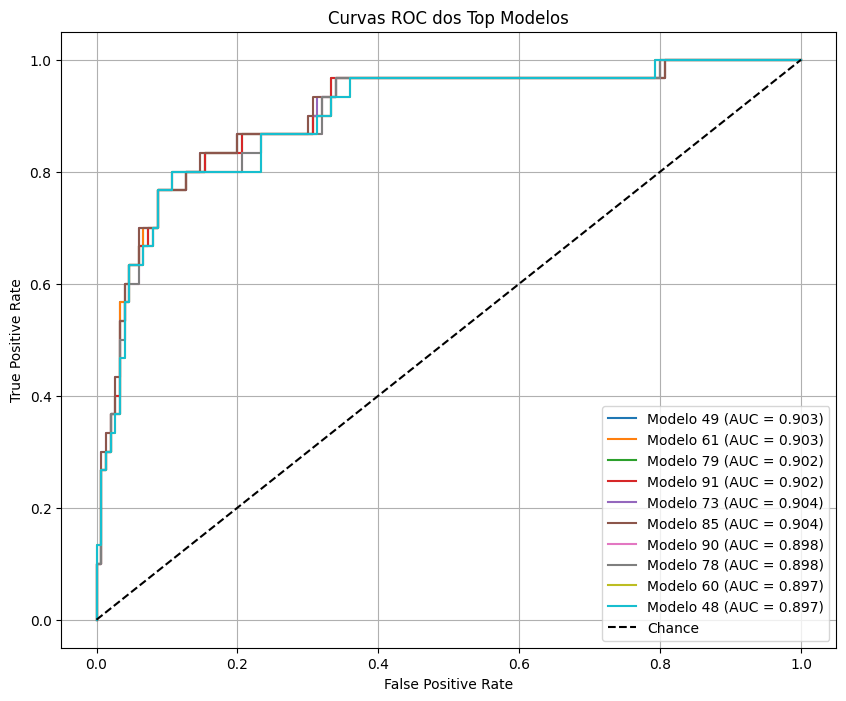

{'memory': None, 'steps': [('scaler', 'passthrough'), ('smote', BorderlineSMOTE(random_state=42)), ('clf', LogisticRegression(C=10, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear'))], 'transform_input': None, 'verbose': False, 'scaler': 'passthrough', 'smote': BorderlineSMOTE(random_state=42), 'clf': LogisticRegression(C=10, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear'), 'smote__k_neighbors': 5, 'smote__kind': 'borderline-1', 'smote__m_neighbors': 10, 'smote__n_jobs': None, 'smote__random_state': 42, 'smote__sampling_strategy': 'auto', 'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 1, 'clf__l1_ratio': None, 'clf__max_iter': 1000, 'clf__multi_class': 'deprecated', 'clf__n_jobs': None, 'clf__penalty': 'l1', 'clf__random_state': None, 'clf__solver': 'liblinear', 'clf__tol': 0.0001, 'clf__verbose': 0, 'clf__warm_start': False}


In [173]:
melhor_modelo, comparativo_auc, melhor_params = avaliar_top_modelos_com_roc(
    grid_search, X_train, y_train, X_test, y_test, top_n=10
)

melhor_modelo.fit(X_train, y_train)

print(melhor_modelo.get_params())


{'memory': None, 'steps': [('scaler', 'passthrough'), ('smote', BorderlineSMOTE(random_state=42)), ('clf', LogisticRegression(C=10, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear'))], 'transform_input': None, 'verbose': False, 'scaler': 'passthrough', 'smote': BorderlineSMOTE(random_state=42), 'clf': LogisticRegression(C=10, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear'), 'smote__k_neighbors': 5, 'smote__kind': 'borderline-1', 'smote__m_neighbors': 10, 'smote__n_jobs': None, 'smote__random_state': 42, 'smote__sampling_strategy': 'auto', 'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 1, 'clf__l1_ratio': None, 'clf__max_iter': 1000, 'clf__multi_class': 'deprecated', 'clf__n_jobs': None, 'clf__penalty': 'l1', 'clf__random_state': None, 'clf__solver': 'liblinear', 'clf__tol': 0.0001, 'clf__verbose': 0, 'clf__warm_start': False}


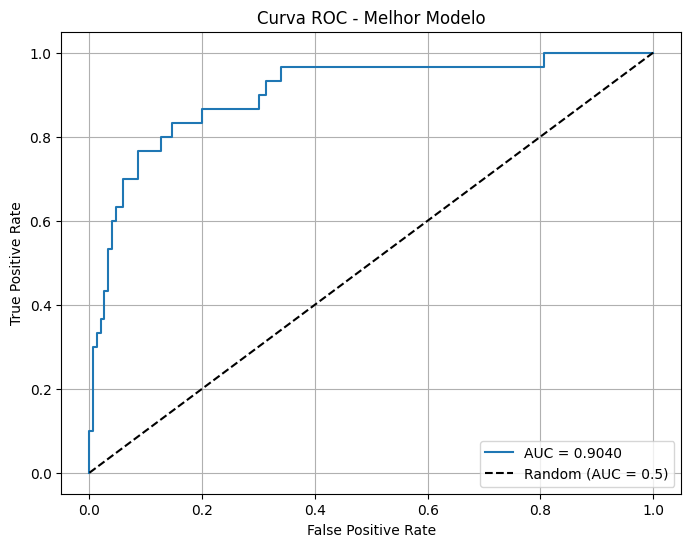

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtem as probabilidades para a classe positiva
y_proba = melhor_modelo.predict_proba(X_test)[:, 1]

print(melhor_modelo.get_params())

# Calcula FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Melhor Modelo")
plt.legend(loc="lower right")
plt.grid()
plt.show()


/home/rcalabro/codebase/senac-ia/decision-systems/project-client-churn/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


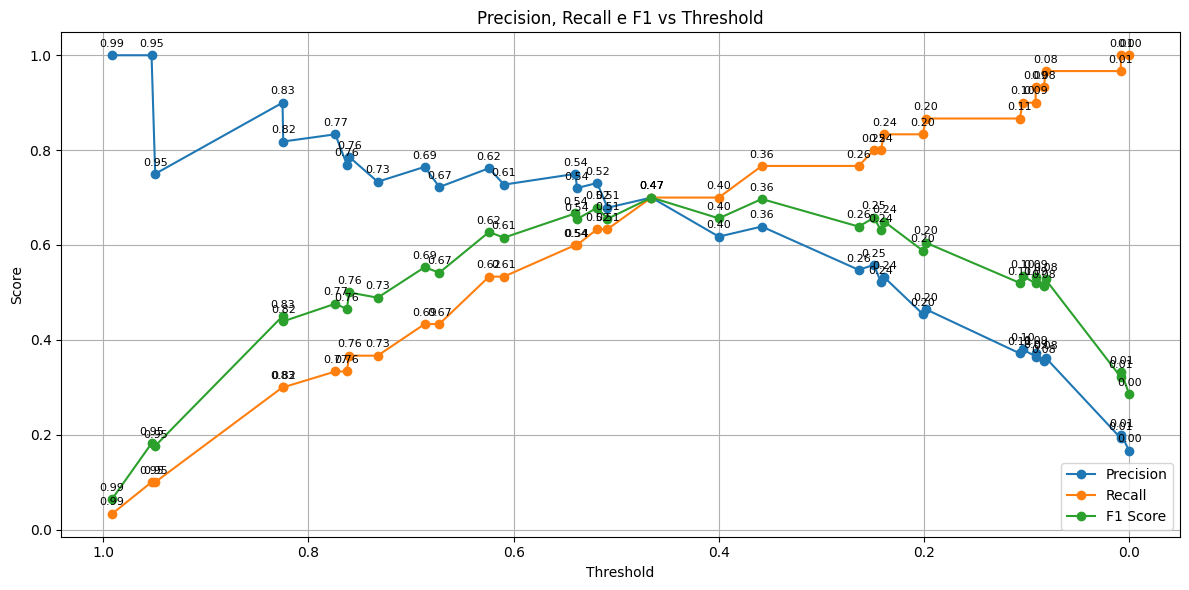

In [165]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calcula métricas para cada threshold
precision = []
recall = []
f1 = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precision.append(precision_score(y_test, y_pred_t))
    recall.append(recall_score(y_test, y_pred_t))
    f1.append(f1_score(y_test, y_pred_t))

# Plota
plt.figure(figsize=(12, 6))

# Precision
plt.plot(thresholds, precision, label='Precision', marker='o')
for i, t in enumerate(thresholds):
    plt.annotate(f"{t:.2f}", (thresholds[i], precision[i]), textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8)

# Recall
plt.plot(thresholds, recall, label='Recall', marker='o')
for i, t in enumerate(thresholds):
    plt.annotate(f"{t:.2f}", (thresholds[i], recall[i]), textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8)

# F1 Score
plt.plot(thresholds, f1, label='F1 Score', marker='o')
for i, t in enumerate(thresholds):
    plt.annotate(f"{t:.2f}", (thresholds[i], f1[i]), textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall e F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Inverte o eixo X
plt.tight_layout()
plt.show()



              precision    recall  f1-score   support

           0       0.96      0.80      0.87       150
           1       0.45      0.83      0.59        30

    accuracy                           0.81       180
   macro avg       0.71      0.82      0.73       180
weighted avg       0.88      0.81      0.83       180



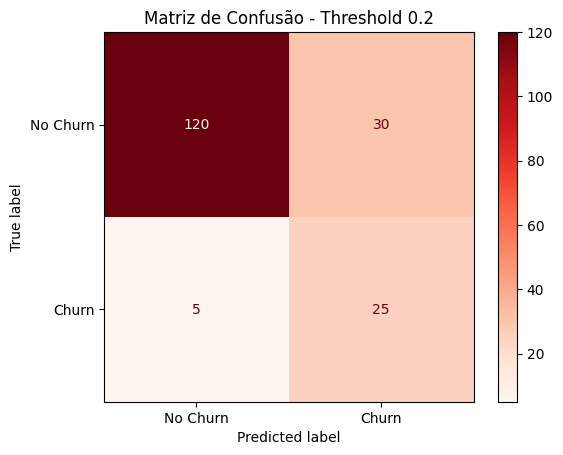

In [ ]:
threshold_recall = 0.24
y_pred_final = (y_proba >= threshold_recall).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Relatório final
print(classification_report(y_test, y_pred_final))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Reds")
plt.title(f"Matriz de Confusão - Threshold {threshold_recall}")
plt.show()
